# Sinhala Semantic Textual Similarity

In [38]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
language = "Sinhala"
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [41]:
train['similarity'] = train['manual_similarity'].apply(lambda x: x*5)
test['similarity'] = test['manual_similarity'].apply(lambda x: x*5)

train["id"] = train.index + 1
test["id"] = test.index + 1

Let's see what are the rows in train and test datasets

In [42]:
train[:10]

,ID,sentence_1,sentence_2,manual_similarity,similarity,id
0,1,මිනිසුන් දෙදෙනෙකු මෝටර් රථ ක්‍රීඩාවක යෙදෙයි,මෝටර්සයිකල් තරඟයකදී තරඟකරුවෙක් අනෙකා හඹා යයි,0.40,2.00,1
1,2,මිනිසුන් දෙදෙනෙකු මෝටර් රථ ක්‍රීඩාවක යෙදෙයි,මෝටර් රථ තරගයක මෝටර් රථයක් වේගයෙන් ගමන් කරයි,0.47,2.35,2
2,3,මිනිසුන් දෙදෙනෙකු මෝටර් රථ ක්‍රීඩාවක යෙදෙයි,ක්‍රීඩකයන් දෙදෙනෙකු මෝටර් රථයක් පදවයි,0.60,3.00,3
3,4,මිනිසුන් දෙදෙනෙකු මෝටර් රථ ක්‍රීඩාවක යෙදෙයි,මිනිසෙක් ධාවනය වන මොටර් රථයක එල්ලී සිටියි,0.20,1.00,4
4,5,මෝටර්සයිකල් තරඟයකදී තරඟකරුවෙක් අනෙකා හඹා යයි,මෝටර් රථ තරගයක මෝටර් රථයක් වේගයෙන් ගමන් කරයි,0.40,2.00,5
5,6,මෝටර්සයිකල් තරඟයකදී තරඟකරුවෙක් අනෙකා හඹා යයි,ක්‍රීඩකයන් දෙදෙනෙකු මෝටර් රථයක් පදවයි,0.20,1.00,6
6,7,මෝටර්සයිකල් තරඟයකදී තරඟකරුවෙක් අනෙකා හඹා යයි,මිනිසෙක් ධාවනය වන මොටර් රථයක එල්ලී සිටියි,0.27,1.35,7
7,8,මෝටර් රථ තරගයක මෝටර් රථයක් වේගයෙන් ගමන් කරයි,ක්‍රීඩකයන් දෙදෙනෙකු මෝටර් රථයක් පදවයි,0.20,1.00,8
8,9,මෝටර් රථ තරගයක මෝටර් රථයක් වේගයෙන් ගමන් කරයි,මිනිසෙක් ධාවනය වන මොටර් රථයක එල්ලී සිටියි,0.20,1.00,9
9,10,ක්‍රීඩකයන් දෙදෙනෙකු මෝටර් රථයක් පදවයි,මිනිසෙක් ධාවනය වන මොටර් රථයක එල්ලී සිටියි,0.40,2.00,10


In [43]:
train.describe()

,ID,manual_similarity,similarity,id
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,0.562590,2.812950,2500.500000
std,1443.520003,0.275493,1.377466,1443.520003
min,1.000000,0.000000,0.000000,1.000000
25%,1250.750000,0.400000,2.000000,1250.750000
50%,2500.500000,0.600000,3.000000,2500.500000
75%,3750.250000,0.730000,3.650000,3750.250000
max,5000.000000,1.000000,5.000000,5000.000000


In [44]:
test[:10]

,ID,sentence_1,sentence_2,manual_similarity,similarity,id
0,1,මිනිසුන් දෙදෙනෙකු මෝටර් රථ ක්‍රීඩාවක යෙදෙයි,මෝටර්සයිකල් තරඟයකදී තරඟකරුවෙක් අනෙකා හඹා යයි,0.40,2.00,1
1,2,මිනිසුන් දෙදෙනෙකු මෝටර් රථ ක්‍රීඩාවක යෙදෙයි,මෝටර් රථ තරගයක මෝටර් රථයක් වේගයෙන් ගමන් කරයි,0.47,2.35,2
2,3,මිනිසුන් දෙදෙනෙකු මෝටර් රථ ක්‍රීඩාවක යෙදෙයි,ක්‍රීඩකයන් දෙදෙනෙකු මෝටර් රථයක් පදවයි,0.60,3.00,3
3,4,මිනිසුන් දෙදෙනෙකු මෝටර් රථ ක්‍රීඩාවක යෙදෙයි,මිනිසෙක් ධාවනය වන මොටර් රථයක එල්ලී සිටියි,0.20,1.00,4
4,5,මෝටර්සයිකල් තරඟයකදී තරඟකරුවෙක් අනෙකා හඹා යයි,මෝටර් රථ තරගයක මෝටර් රථයක් වේගයෙන් ගමන් කරයි,0.40,2.00,5
5,6,මෝටර්සයිකල් තරඟයකදී තරඟකරුවෙක් අනෙකා හඹා යයි,ක්‍රීඩකයන් දෙදෙනෙකු මෝටර් රථයක් පදවයි,0.20,1.00,6
6,7,මෝටර්සයිකල් තරඟයකදී තරඟකරුවෙක් අනෙකා හඹා යයි,මිනිසෙක් ධාවනය වන මොටර් රථයක එල්ලී සිටියි,0.27,1.35,7
7,8,මෝටර් රථ තරගයක මෝටර් රථයක් වේගයෙන් ගමන් කරයි,ක්‍රීඩකයන් දෙදෙනෙකු මෝටර් රථයක් පදවයි,0.20,1.00,8
8,9,මෝටර් රථ තරගයක මෝටර් රථයක් වේගයෙන් ගමන් කරයි,මිනිසෙක් ධාවනය වන මොටර් රථයක එල්ලී සිටියි,0.20,1.00,9
9,10,ක්‍රීඩකයන් දෙදෙනෙකු මෝටර් රථයක් පදවයි,මිනිසෙක් ධාවනය වන මොටර් රථයක එල්ලී සිටියි,0.40,2.00,10


In [45]:
def convert(row):
    if row['similarity'] <= 1.0:
        return '0-1'
    elif 1.0 < row['similarity'] <= 2.0:
        return '1-2'
    elif 2.0 < row['similarity'] <= 3.0:
        return '2-3'
    elif 3.0 < row['similarity'] <= 4.0:
        return '3-4'
    else:
        return '4-5'

train['category'] = train.apply(convert, axis=1)
test['category'] = test.apply(convert, axis=1)

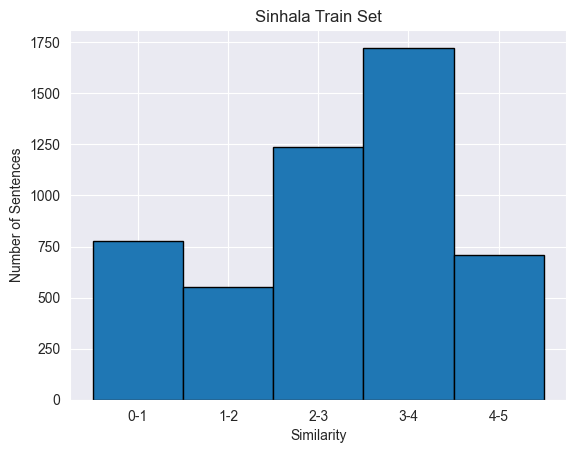

In [46]:
train.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Train Set")
plt.show()

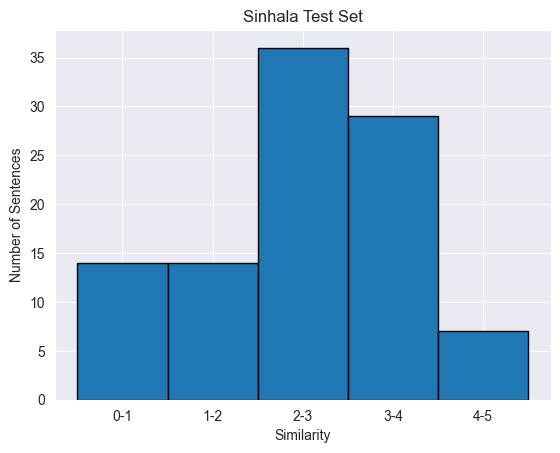

In [47]:
test.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Test Set")
plt.show()

In [48]:
def normalized_word_Common(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), str(row[column_1]).split()))
    w2 = set(map(lambda word: word.lower().strip(), str(row[column_2]).split()))
    return 1.0* len(w1 & w2)

def normalized_word_Total(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), str(row[column_1]).split()))
    w2 = set(map(lambda word: word.lower().strip(), str(row[column_2]).split()))
    return 1* (len(w1) + len(w2))

def normalized_word_share(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), str(row[column_1]).split()))
    w2 = set(map(lambda word: word.lower().strip(), str(row[column_2]).split()))
    return 1.0*len(w1 & w2) / (len(w1) + len(w2))

def prepare_frequencies(df, id_column, column_1, column_2):
    df['freq_1'] = df.groupby(id_column)[id_column].transform('count')
    df['freq_2'] = df.groupby(id_column)[id_column].transform('count')
    df['s1len'] = df[column_1].str.len()
    df['s2len'] = df[column_2].str.len()
    df['s1_n_words'] = df[column_1].apply(lambda row :len(str(row).split(" ")))
    df['s2_n_words'] = df[column_2].apply(lambda row :len(str(row).split(" ")))

    df['word_Common'] = df.apply(normalized_word_Common, args=(column_1,column_2), axis=1)
    df['word_Total'] = df.apply(normalized_word_Total, args=(column_1,column_2), axis = 1)
    df['word_share'] = df.apply(normalized_word_share, args=(column_1,column_2), axis = 1)

    df['freq_s1+s2'] = df['freq_1'] + df['freq_2']
    df['freq_s1-s2'] = abs(df['freq_1'] - df['freq_2'])

    return df


In [49]:
train = prepare_frequencies(train, "id", "sentence_1", "sentence_2")
test = prepare_frequencies(test, "id", "sentence_1", "sentence_2")

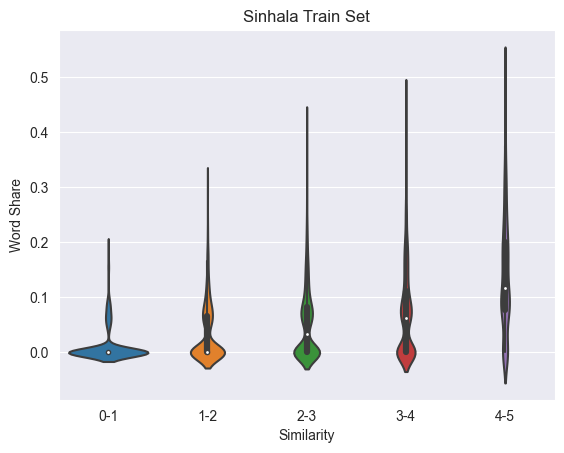

In [50]:
ax = sns.violinplot(x = 'category', y='word_share', data = train[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Train Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

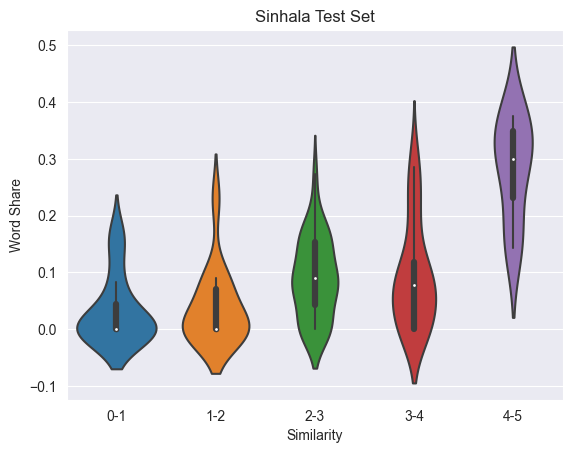

In [51]:
ax = sns.violinplot(x = 'category', y='word_share', data = test[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Test Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

In [52]:
train[:10]

,ID,sentence_1,sentence_2,manual_similarity,similarity,id,category,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
0,1,මිනිසුන් දෙදෙනෙකු මෝටර් රථ ක්‍රීඩාවක යෙදෙයි,මෝටර්සයිකල් තරඟයකදී තරඟකරුවෙක් අනෙකා හඹා යයි,0.40,2.00,1,1-2,1,1,43,44.0,6,6,0.0,12,0.000000,2,0
1,2,මිනිසුන් දෙදෙනෙකු මෝටර් රථ ක්‍රීඩාවක යෙදෙයි,මෝටර් රථ තරගයක මෝටර් රථයක් වේගයෙන් ගමන් කරයි,0.47,2.35,2,2-3,1,1,43,45.0,6,9,2.0,13,0.153846,2,0
2,3,මිනිසුන් දෙදෙනෙකු මෝටර් රථ ක්‍රීඩාවක යෙදෙයි,ක්‍රීඩකයන් දෙදෙනෙකු මෝටර් රථයක් පදවයි,0.60,3.00,3,2-3,1,1,43,37.0,6,5,2.0,11,0.181818,2,0
3,4,මිනිසුන් දෙදෙනෙකු මෝටර් රථ ක්‍රීඩාවක යෙදෙයි,මිනිසෙක් ධාවනය වන මොටර් රථයක එල්ලී සිටියි,0.20,1.00,4,0-1,1,1,43,42.0,6,8,0.0,13,0.000000,2,0
4,5,මෝටර්සයිකල් තරඟයකදී තරඟකරුවෙක් අනෙකා හඹා යයි,මෝටර් රථ තරගයක මෝටර් රථයක් වේගයෙන් ගමන් කරයි,0.40,2.00,5,1-2,1,1,44,45.0,6,9,0.0,13,0.000000,2,0
5,6,මෝටර්සයිකල් තරඟයකදී තරඟකරුවෙක් අනෙකා හඹා යයි,ක්‍රීඩකයන් දෙදෙනෙකු මෝටර් රථයක් පදවයි,0.20,1.00,6,0-1,1,1,44,37.0,6,5,0.0,11,0.000000,2,0
6,7,මෝටර්සයිකල් තරඟයකදී තරඟකරුවෙක් අනෙකා හඹා යයි,මිනිසෙක් ධාවනය වන මොටර් රථයක එල්ලී සිටියි,0.27,1.35,7,1-2,1,1,44,42.0,6,8,0.0,13,0.000000,2,0
7,8,මෝටර් රථ තරගයක මෝටර් රථයක් වේගයෙන් ගමන් කරයි,ක්‍රීඩකයන් දෙදෙනෙකු මෝටර් රථයක් පදවයි,0.20,1.00,8,0-1,1,1,45,37.0,9,5,2.0,12,0.166667,2,0
8,9,මෝටර් රථ තරගයක මෝටර් රථයක් වේගයෙන් ගමන් කරයි,මිනිසෙක් ධාවනය වන මොටර් රථයක එල්ලී සිටියි,0.20,1.00,9,0-1,1,1,45,42.0,9,8,0.0,14,0.000000,2,0
9,10,ක්‍රීඩකයන් දෙදෙනෙකු මෝටර් රථයක් පදවයි,මිනිසෙක් ධාවනය වන මොටර් රථයක එල්ලී සිටියි,0.40,2.00,10,1-2,1,1,37,42.0,5,8,0.0,12,0.000000,2,0


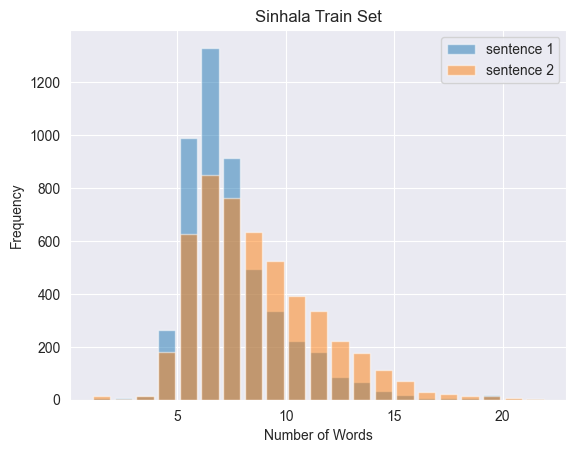

In [53]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(train['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(train['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Train Set")
plt.legend()
plt.show()

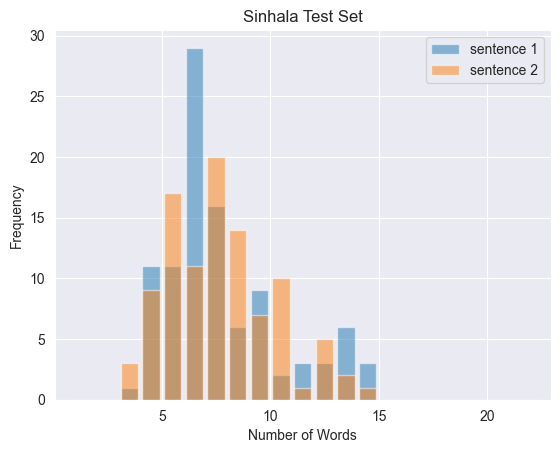

In [54]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(test['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(test['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Test Set")
plt.legend()
plt.show()

In [55]:
train.describe()

,ID,manual_similarity,similarity,id,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,4996.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.0,5000.0
mean,2500.500000,0.562590,2.812950,2500.500000,1.0,1.0,44.509000,50.290432,6.999600,8.163600,0.86220,14.257600,0.062270,2.0,0.0
std,1443.520003,0.275493,1.377466,1443.520003,0.0,0.0,15.366885,17.517648,2.346807,2.901675,1.07696,3.629308,0.079497,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,1.0,1.0,3.000000,3.000000,1.000000,1.000000,0.00000,2.000000,0.000000,2.0,0.0
25%,1250.750000,0.400000,2.000000,1250.750000,1.0,1.0,35.000000,38.000000,5.000000,6.000000,0.00000,12.000000,0.000000,2.0,0.0
50%,2500.500000,0.600000,3.000000,2500.500000,1.0,1.0,41.000000,47.000000,6.000000,8.000000,1.00000,14.000000,0.045455,2.0,0.0
75%,3750.250000,0.730000,3.650000,3750.250000,1.0,1.0,51.000000,60.000000,8.000000,10.000000,1.00000,16.000000,0.095238,2.0,0.0
max,5000.000000,1.000000,5.000000,5000.000000,1.0,1.0,130.000000,130.000000,21.000000,21.000000,7.00000,33.000000,0.500000,2.0,0.0


In [56]:
test.describe()

,ID,manual_similarity,similarity,id,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0
mean,50.500000,0.547700,2.738500,50.500000,1.0,1.0,45.960000,42.44000,7.260000,7.220000,1.130000,13.560000,0.089468,2.0,0.0
std,29.011492,0.220692,1.103458,29.011492,0.0,0.0,17.290693,13.77402,2.710324,2.455997,1.151679,3.473769,0.095833,0.0,0.0
min,1.000000,0.070000,0.350000,1.000000,1.0,1.0,21.000000,21.00000,3.000000,3.000000,0.000000,7.000000,0.000000,2.0,0.0
25%,25.750000,0.400000,2.000000,25.750000,1.0,1.0,34.000000,33.00000,6.000000,5.000000,0.000000,11.000000,0.000000,2.0,0.0
50%,50.500000,0.600000,3.000000,50.500000,1.0,1.0,40.000000,40.00000,6.000000,7.000000,1.000000,13.000000,0.071429,2.0,0.0
75%,75.250000,0.730000,3.650000,75.250000,1.0,1.0,57.000000,46.50000,9.000000,9.000000,2.000000,16.000000,0.150962,2.0,0.0
max,100.000000,1.000000,5.000000,100.000000,1.0,1.0,85.000000,85.00000,14.000000,14.000000,4.000000,25.000000,0.375000,2.0,0.0
